<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

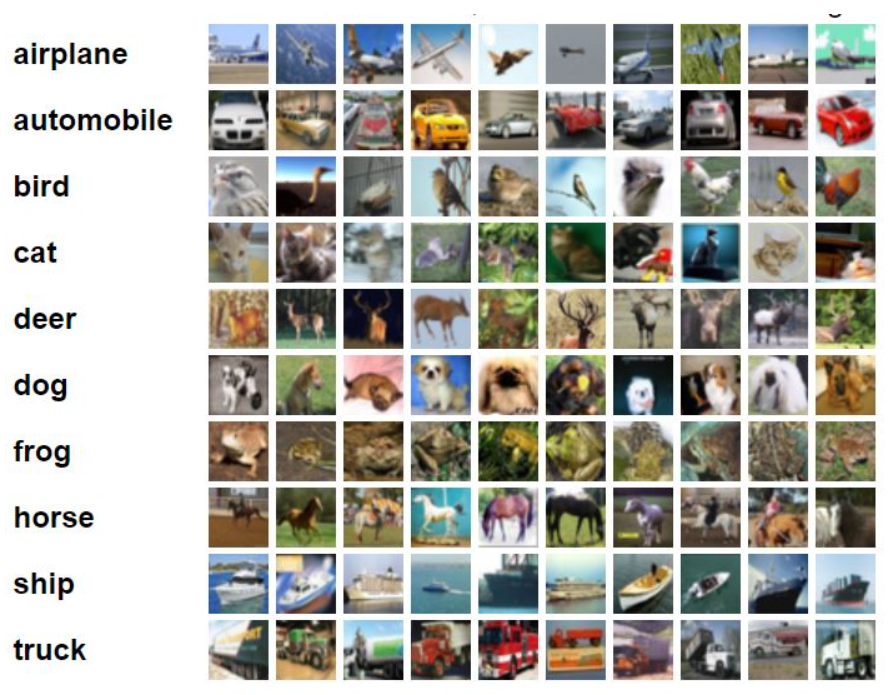

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 46s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

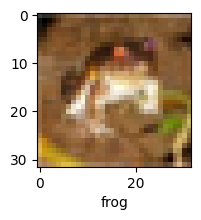

In [10]:
plot_sample(X_train, y_train, 0)

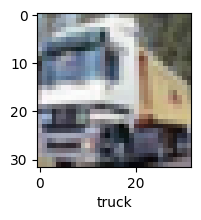

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 108s 57ms/step - loss: 1.8133 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.6206 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5384 - accuracy: 0.4579
Epoch 4/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4790 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4313 - accuracy: 0.4939


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.60      0.57      1000
           1       0.70      0.44      0.54      1000
           2       0.40      0.31      0.35      1000
           3       0.40      0.28      0.33      1000
           4       0.34      0.58      0.43      1000
           5       0.48      0.25      0.33      1000
           6       0.59      0.40      0.48      1000
           7       0.43      0.65      0.52      1000
           8       0.73      0.49      0.59      1000
           9       0.43      0.73      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 11ms/step - loss: 1.4366 - accuracy: 0.4839
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0837 - accuracy: 0.6184
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9602 - accuracy: 0.6654
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8694 - accuracy: 0.6967
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7953 - accuracy: 0.7241
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7333 - accuracy: 0.7442
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6792 - accuracy: 0.7613
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6310 - accuracy: 0.7810
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5910 - accuracy: 0.7933
Epoch 10/10
1563/1563 [==============================] - 22s 14m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9275 - accuracy: 0.7064


[0.9274605512619019, 0.7063999772071838]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.0988910e-04, 9.3299159e-06, 3.4974309e-04, 8.7824893e-01,
        2.8018847e-05, 1.0523791e-01, 1.4274949e-02, 3.1680549e-05,
        1.7090018e-03, 4.2616165e-07],
       [3.7603164e-05, 1.6328403e-04, 1.9117115e-09, 5.2695443e-12,
        1.7243930e-11, 8.2302166e-14, 3.7480800e-12, 5.6909745e-14,
        9.9979860e-01, 4.6917205e-07],
       [2.9256028e-01, 4.3455478e-02, 2.4528913e-03, 7.6756772e-04,
        7.9215225e-03, 2.5182325e-04, 3.7352683e-04, 1.4339400e-02,
        6.2126905e-01, 1.6608540e-02],
       [9.6617049e-01, 3.0911244e-03, 6.5731164e-03, 1.2521462e-03,
        4.6067634e-03, 3.1624040e-05, 5.7532865e-04, 2.7840745e-06,
        1.7647609e-02, 4.9157952e-05],
       [7.2918135e-07, 7.0404822e-06, 1.8672084e-02, 4.5934197e-01,
        2.2690347e-01, 7.4732043e-03, 2.8742528e-01, 4.8883448e-05,
        1.2310658e-04, 4.2163460e-06]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 3]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

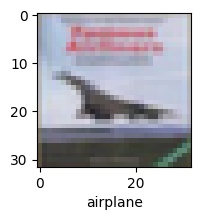

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[3]]

'airplane'